In [2]:
#Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score


In [ ]:
#reading the data from local csv file
data = pd.read_csv('SPTrial.csv')

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...,...
2635,2020-06-23,3138.699951,3154.899902,3127.120117,3131.290039,3131.290039,4704830000
2636,2020-06-24,3114.399902,3115.010010,3032.129883,3050.330078,3050.330078,5587200000
2637,2020-06-25,3046.600098,3086.250000,3024.010010,3083.760010,3083.760010,4815420000
2638,2020-06-26,3073.199951,3073.729980,3004.629883,3009.050049,3009.050049,8098120000


In [4]:
df = pd.DataFrame(data)

In [5]:
#Removing unneccessary columns
df1=df.drop(['Open','High','Low','Close'], axis=1)

In [6]:
df1

,Date,Adj Close,Volume
0,2010-01-04,1132.989990,3991400000
1,2010-01-05,1136.520020,2491020000
2,2010-01-06,1137.140015,4972660000
3,2010-01-07,1141.689941,5270680000
4,2010-01-08,1144.979980,4389590000
...,...,...,...
2635,2020-06-23,3131.290039,4704830000
2636,2020-06-24,3050.330078,5587200000
2637,2020-06-25,3083.760010,4815420000
2638,2020-06-26,3009.050049,8098120000


In [7]:
#Creating 'Today' column based on Percentage Change
df1['Today'] = df1['Adj Close'].pct_change(1)

In [8]:
df1

,Date,Adj Close,Volume,Today
0,2010-01-04,1132.989990,3991400000,NaN
1,2010-01-05,1136.520020,2491020000,0.003116
2,2010-01-06,1137.140015,4972660000,0.000546
3,2010-01-07,1141.689941,5270680000,0.004001
4,2010-01-08,1144.979980,4389590000,0.002882
...,...,...,...,...
2635,2020-06-23,3131.290039,4704830000,0.004307
2636,2020-06-24,3050.330078,5587200000,-0.025855
2637,2020-06-25,3083.760010,4815420000,0.010959
2638,2020-06-26,3009.050049,8098120000,-0.024227


In [10]:
#Creating lag features required for Time Series Analysis
df1['lag_1'] = df1['Today'].shift(1)
df1['lag_2'] = df1['Today'].shift(2)
df1['lag_3'] = df1['Today'].shift(3)
df1['lag_4'] = df1['Today'].shift(4)
df1['lag_5'] = df1['Today'].shift(5)

In [14]:
df1.loc[df1['Today'] > 0 , 'Direction'] = "Up"
df1.loc[df1['Today'] < 0 , 'Direction'] = "Down"

In [15]:
df1

,Date,Adj Close,Volume,Today,lag_1,lag_2,lag_3,lag_4,lag_5,Direction
0,2010-01-04,1132.989990,3991400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,1136.520020,2491020000,0.003116,NaN,NaN,NaN,NaN,NaN,Up
2,2010-01-06,1137.140015,4972660000,0.000546,0.003116,NaN,NaN,NaN,NaN,Up
3,2010-01-07,1141.689941,5270680000,0.004001,0.000546,0.003116,NaN,NaN,NaN,Up
4,2010-01-08,1144.979980,4389590000,0.002882,0.004001,0.000546,0.003116,NaN,NaN,Up
...,...,...,...,...,...,...,...,...,...,...
2635,2020-06-23,3131.290039,4704830000,0.004307,0.006495,-0.005649,0.000594,-0.003600,0.018962,Up
2636,2020-06-24,3050.330078,5587200000,-0.025855,0.004307,0.006495,-0.005649,0.000594,-0.003600,Down
2637,2020-06-25,3083.760010,4815420000,0.010959,-0.025855,0.004307,0.006495,-0.005649,0.000594,Up
2638,2020-06-26,3009.050049,8098120000,-0.024227,0.010959,-0.025855,0.004307,0.006495,-0.005649,Down


In [17]:
#Correlation plot in creative way
rs = np.random.RandomState(0)
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Adj Close,Volume,Today,lag_1,lag_2,lag_3,lag_4,lag_5
Adj Close,1,-0.106579,0.0148904,0.00749014,0.013265,0.0119146,0.0111267,0.0122389
Volume,-0.106579,1,-0.0928862,-0.0877091,-0.082088,-0.0582248,-0.0992541,-0.0404004
Today,0.0148904,-0.0928862,1,-0.157521,0.0975843,-0.0362903,-0.050565,0.00729993
lag_1,0.00749014,-0.0877091,-0.157521,1,-0.156626,0.0971653,-0.0351733,-0.0507536
lag_2,0.013265,-0.082088,0.0975843,-0.156626,1,-0.155993,0.09534,-0.0349105
lag_3,0.0119146,-0.0582248,-0.0362903,0.0971653,-0.155993,1,-0.155325,0.0952319
lag_4,0.0111267,-0.0992541,-0.050565,-0.0351733,0.09534,-0.155325,1,-0.15518
lag_5,0.0122389,-0.0404004,0.00729993,-0.0507536,-0.0349105,0.0952319,-0.15518,1


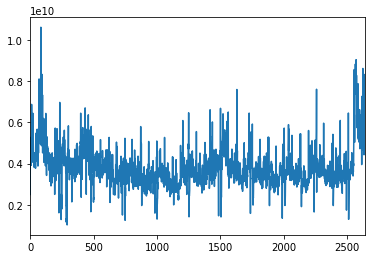

In [18]:
df1['Volume'].plot()

In [20]:
df1.set_index(df1['Date'])

,Date,Adj Close,Volume,Today,lag_1,lag_2,lag_3,lag_4,lag_5,Direction
Date,,,,,,,,,,
2010-01-04,2010-01-04,1132.989990,3991400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,2010-01-05,1136.520020,2491020000,0.003116,NaN,NaN,NaN,NaN,NaN,Up
2010-01-06,2010-01-06,1137.140015,4972660000,0.000546,0.003116,NaN,NaN,NaN,NaN,Up
2010-01-07,2010-01-07,1141.689941,5270680000,0.004001,0.000546,0.003116,NaN,NaN,NaN,Up
2010-01-08,2010-01-08,1144.979980,4389590000,0.002882,0.004001,0.000546,0.003116,NaN,NaN,Up
...,...,...,...,...,...,...,...,...,...,...
2020-06-23,2020-06-23,3131.290039,4704830000,0.004307,0.006495,-0.005649,0.000594,-0.003600,0.018962,Up
2020-06-24,2020-06-24,3050.330078,5587200000,-0.025855,0.004307,0.006495,-0.005649,0.000594,-0.003600,Down
2020-06-25,2020-06-25,3083.760010,4815420000,0.010959,-0.025855,0.004307,0.006495,-0.005649,0.000594,Up


In [ ]:
df1

In [21]:
df2= df1[df1.Date< '2020-02-20']

In [22]:
#splitting dataset into train and test split
training_size=int(len(df2)*0.75)
test_size=len(df2)-training_size
train_data,test_data=df2.iloc[0:training_size,:],df2.iloc[training_size:len(df2),:]

In [23]:
train_data

,Date,Adj Close,Volume,Today,lag_1,lag_2,lag_3,lag_4,lag_5,Direction
0,2010-01-04,1132.989990,3991400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,1136.520020,2491020000,0.003116,NaN,NaN,NaN,NaN,NaN,Up
2,2010-01-06,1137.140015,4972660000,0.000546,0.003116,NaN,NaN,NaN,NaN,Up
3,2010-01-07,1141.689941,5270680000,0.004001,0.000546,0.003116,NaN,NaN,NaN,Up
4,2010-01-08,1144.979980,4389590000,0.002882,0.004001,0.000546,0.003116,NaN,NaN,Up
...,...,...,...,...,...,...,...,...,...,...
1906,2017-07-31,2470.300049,3469210000,-0.000728,-0.001341,-0.000973,0.000283,0.002923,-0.001064,Down
1907,2017-08-01,2476.350098,3460860000,0.002449,-0.000728,-0.001341,-0.000973,0.000283,0.002923,Up
1908,2017-08-02,2477.570068,3478580000,0.000493,0.002449,-0.000728,-0.001341,-0.000973,0.000283,Up
1909,2017-08-03,2472.159912,3645020000,-0.002184,0.000493,0.002449,-0.000728,-0.001341,-0.000973,Down


In [36]:
#Removing NA values
train_data= train_data.dropna()
test_data= test_data.dropna()

In [44]:

X_train = train_data[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train = train_data['Direction']

X_test = test_data[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_test = test_data[['Direction']]

In [45]:
X_train= X_train.dropna()

In [46]:
y_train= y_train.dropna()

In [47]:
len(X_train),len(y_train)

(1904, 1904)

In [48]:
#Fitting Linear Discriminant Analysis Model
lda = LDA()
model = lda.fit(X_train,y_train)

print(model.priors_)

[0.45903361 0.54096639]


In [49]:
#Predicting values with LDA
pred=model.predict(X_test)
print(np.unique(pred, return_counts=True))

(array(['Down', 'Up'], dtype='<U4'), array([ 21, 617], dtype=int64))


In [55]:
#Classification report for LDA
print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred, digits=3))

[[ 10  11]
 [263 354]]
              precision    recall  f1-score   support

        Down      0.476     0.037     0.068       273
          Up      0.574     0.970     0.721       365

    accuracy                          0.571       638
   macro avg      0.525     0.503     0.395       638
weighted avg      0.532     0.571     0.442       638



In [52]:
#Fitting Quadratic Discriminant Analysis Model
qda = QDA()
model2 = qda.fit(X_train, y_train)
print(model2.priors_)
print(model2.means_)

[0.45903361 0.54096639]
[[8.74238090e-04 2.71989589e-04 6.67193769e-04 4.19089532e-04
  7.94410899e-04]
 [9.23271259e-05 6.01419376e-04 2.73640473e-04 4.76015778e-04
  1.58587279e-04]]


In [53]:
#Prediction & Classification report for QDA
pred2=model2.predict(X_test)
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))

(array(['Down', 'Up'], dtype=object), array([370, 268], dtype=int64))
[[158 212]
 [115 153]]
              precision    recall  f1-score   support

        Down      0.427     0.579     0.491       273
          Up      0.571     0.419     0.483       365

    accuracy                          0.487       638
   macro avg      0.499     0.499     0.487       638
weighted avg      0.509     0.487     0.487       638

